In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("heart.csv")

In [2]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#EDA
df.shape

(918, 12)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='HeartDisease'>

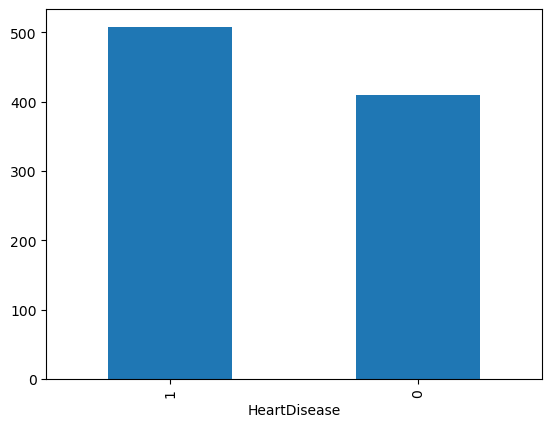

In [11]:
df['HeartDisease'].value_counts().plot(kind='bar')

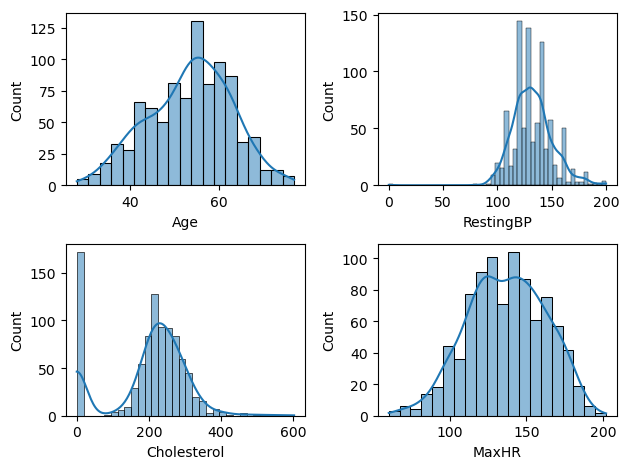

In [15]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [19]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [21]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [22]:
rb_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()
rb_mean

np.float64(132.54089422028352)

In [23]:
df['RestingBP']=df['RestingBP'].replace(0,ch_mean)
df['RestingBP']=df['RestingBP'].round(2)

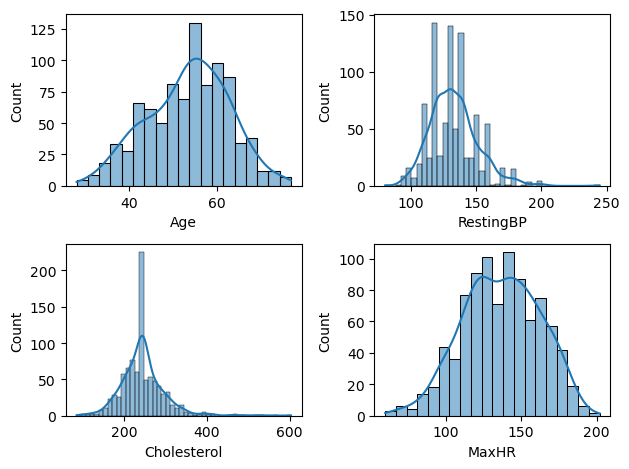

In [24]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

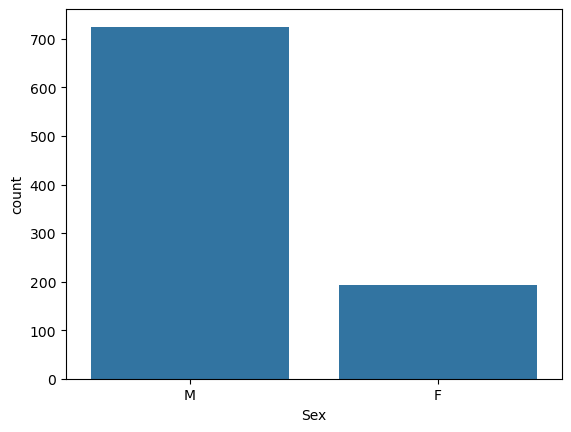

In [26]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

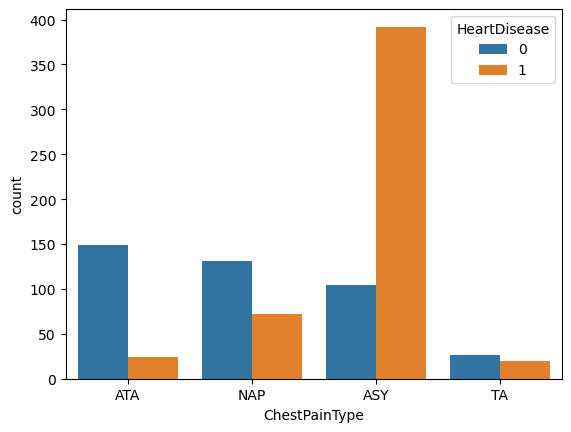

In [29]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

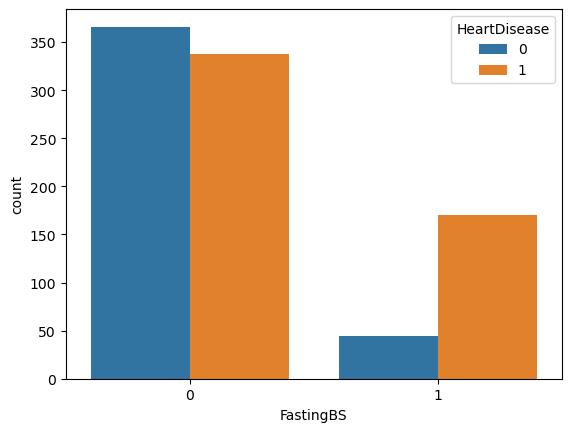

In [30]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

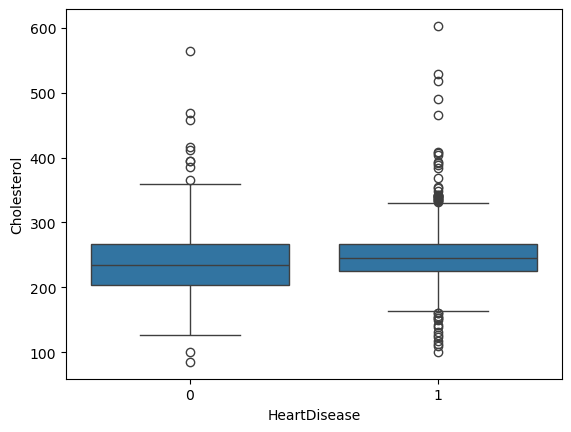

In [32]:
sns.boxplot(y=df['Cholesterol'],x=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

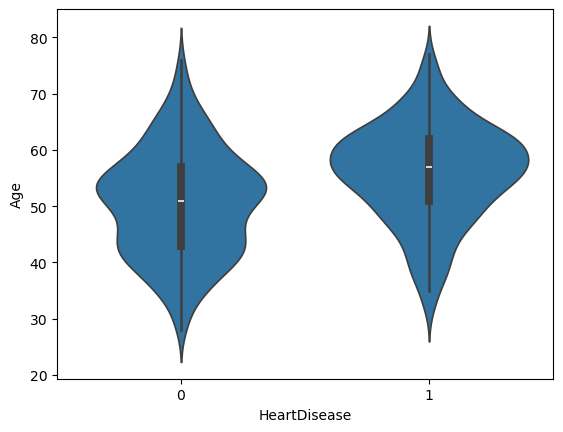

In [33]:
sns.violinplot(x=df['HeartDisease'],y=df['Age'])

<Axes: >

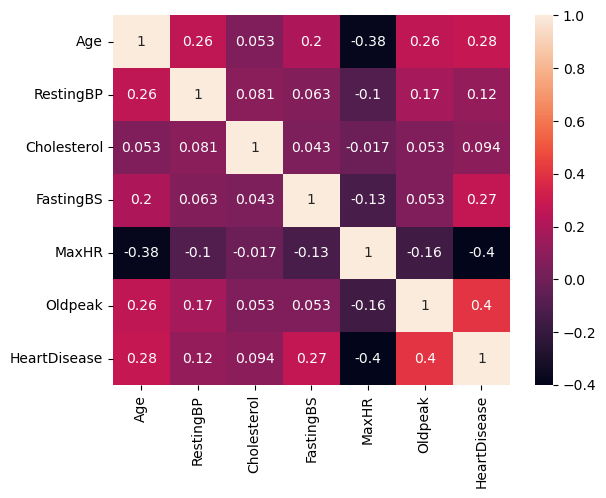

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [35]:
df_encode = pd.get_dummies(df,drop_first=True)

In [36]:
df_encode = df_encode.astype(int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [37]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.399826,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.489614,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.145068,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.290847,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.944720,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
